In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Plot different LAS difficulties

### 1. rollout/return

In [47]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
#-----------

import glob
interval = ["point125","point25","point5","point75","one"]
itv = interval[4]
# itv = "ddpg"
csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/new/"+itv+"/"
plot_save_dir = './plots_for_thesis/single/ddpg/64_64_NN/new/'
if not os.path.exists(plot_save_dir):
    os.makedirs(plot_save_dir)
modes = ["SARA","PLA","Random"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(csv_dir+"run_"+ mode +"*.csv")
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 0 files found
PLA: 0 files found
Random: 6 files found
../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/new/one\run_Random_2019-10-28-144314-0-0_1572288214gra134_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/new/one\run_Random_2019-10-28-144317-1-0_1572288217gra133_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/new/one\run_Random_2019-10-28-144918-0-10_1572288579gra1141_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/new/one\run_Random_2019-10-28-144918-1-10_1572288578gra7_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/new/one\run_Random_2019-10-28-145507-0-30_1572288927gra1142_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/new/one\run_Random_2019-10-28-145508-1-30_1572288928gra701_file.csv


In [48]:
csv_dir

'../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/new/one/'

In [49]:
all_combined_data = dict()

for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file))
        
    # Random has no Q_mean records
    if mode == "Random":
        metrics = ["rollout/return"]
    else:
        metrics = ["rollout/return", "rollout/Q_mean"]
    
    mode_combined_data = pd.DataFrame()
    for metric in metrics:
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[metric+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[metric+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[metric+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [50]:
all_combined_data['SARA']

,rollout/return_avg,rollout/return_std,rollout/Q_mean_avg,rollout/Q_mean_std


No SARA data
No PLA data


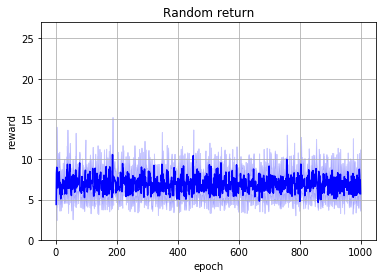

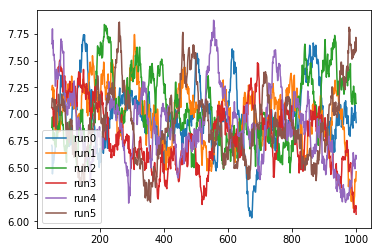

In [51]:
# Plot return
colors = ['r','g','b']
metric = "rollout/return"
me = metric.split('/')[1]
modes = ["SARA","PLA","Random"]
for mode, c in zip(modes, colors):
    data = all_combined_data[mode]
    length = data.shape[0]
    if length == 0:
        print("No {} data".format(mode))
        continue
    
    plt.figure()
    plt.grid()
    
    
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,length,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,length,length), data[metric+'_avg'], '-', color=c,
         label=label)
#     plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(plot_save_dir+'{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')
    
    
    plt.figure()
    for j in range(len(all_data_files[mode])):
        plt.plot(np.linspace(1,length,length), data[metric+'_run{}'.format(j)].rolling(window=50).mean(), '-', label="run"+str(j))
    plt.legend(loc="best")


### 2.rollout/Q_mean

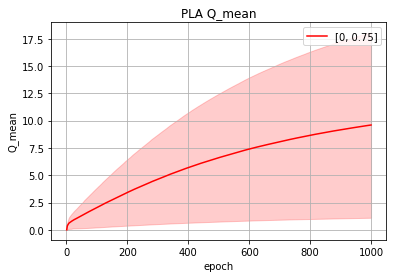

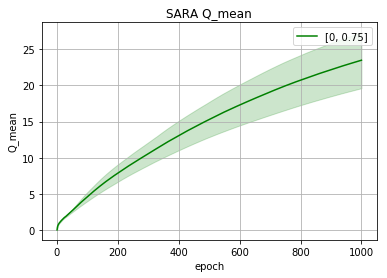

In [36]:
colors = ['r','g','b']
metric = "rollout/Q_mean"
modes = ["PLA","SARA"]
me = metric.split('/')[1]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("Q_mean")
    plt.savefig(plot_save_dir+'{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')
    

---------------------

## Plot different visitor randomness

In [76]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
#-----------

import glob
# interval = ["point125","point25","point5","point75","one"]
interval = ["vzero","vpoint1","vpoint3"]
itv = interval[0]
# itv = "ddpg"
visitors = "single"
csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/old_lazy_visitor_sq_action/"+itv+"/"
plot_save_dir = './plots_for_thesis/single/ddpg/64_64_NN/old_lazy_visitor_sq_action/'
if not os.path.exists(plot_save_dir):
    os.makedirs(plot_save_dir)
modes = ["SARA","PLA","Random"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(csv_dir+"run_"+ mode +"*.csv")
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 3 files found
../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/old_lazy_visitor_sq_action/vzero\run_SARA_2019-11-16-155740-0-10_1573937889gra581_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/old_lazy_visitor_sq_action/vzero\run_SARA_2019-11-16-155740-1-11_1573937889gra581_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/old_lazy_visitor_sq_action/vzero\run_SARA_2019-11-16-155740-2-11_1573937884gra581_file.csv
PLA: 3 files found
../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/old_lazy_visitor_sq_action/vzero\run_PLA_2019-11-16-155733-1-10_1573937877gra582_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/old_lazy_visitor_sq_action/vzero\run_PLA_2019-11-16-155734-0-10_1573937877gra1140_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/old_lazy_visitor_sq_action/vzero\run_PLA_2019-11-16-155736-2-10_1573937881gra595_file.csv
Random: 3 files found
../SHARCNET/Results/Tensorboard_to_

In [77]:
csv_dir

'../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/old_lazy_visitor_sq_action/vzero/'

In [78]:
all_combined_data = dict()

for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file))
        
    # Random has no Q_mean records
    if mode == "Random":
        metrics = ["rollout/return"]
    else:
        metrics = ["rollout/return", "rollout/Q_mean"]
    
    mode_combined_data = pd.DataFrame()
    for metric in metrics:
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[metric+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[metric+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[metric+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [79]:
all_combined_data["SARA"]

,rollout/return_run0,rollout/return_run1,rollout/return_run2,rollout/return_avg,rollout/return_std,rollout/Q_mean_run0,rollout/Q_mean_run1,rollout/Q_mean_run2,rollout/Q_mean_avg,rollout/Q_mean_std
0,0.019039,1.278894,0.499600,0.599178,0.519131,-0.000647,0.001281,0.000907,0.000514,0.000835
1,0.463761,18.842098,11.742292,10.349384,7.567296,0.002758,0.045149,0.023735,0.023881,0.017306
2,0.620765,21.156448,23.561077,15.112764,10.294305,0.006417,0.091945,0.062638,0.053667,0.035488
3,0.212255,21.156448,10.558019,10.642241,8.550639,0.009992,0.147920,0.105634,0.087849,0.057696
4,4.286204,21.156448,11.097349,12.180001,6.929665,0.009519,0.212563,0.155385,0.125822,0.085487
5,0.441647,1.749467,24.535707,8.908940,11.062685,0.015227,0.217654,0.226650,0.153177,0.097615
6,0.393005,13.510042,7.143194,7.015413,5.355770,0.016854,0.247433,0.252036,0.172108,0.109797
7,0.260303,1.721509,15.251502,5.744438,6.748925,0.021274,0.235173,0.292161,0.182869,0.116610
8,1.404466,4.878033,1.810711,2.697736,1.550597,0.024982,0.247166,0.293832,0.188660,0.117295
9,18.660751,20.990520,0.438158,13.363143,9.188703,0.033967,0.287170,0.284285,0.201807,0.118687


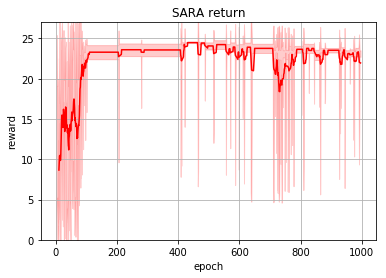

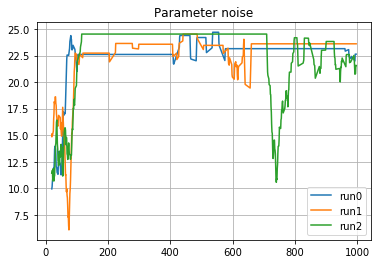

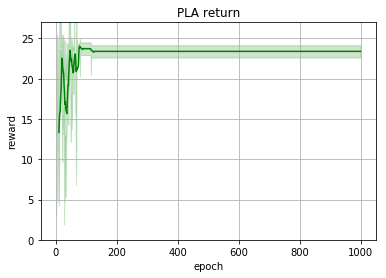

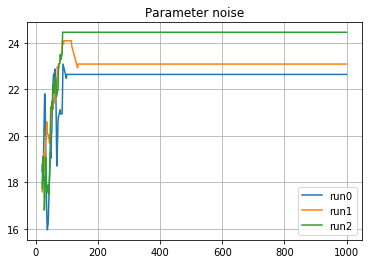

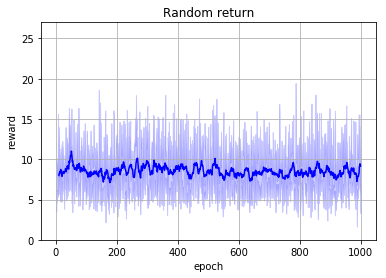

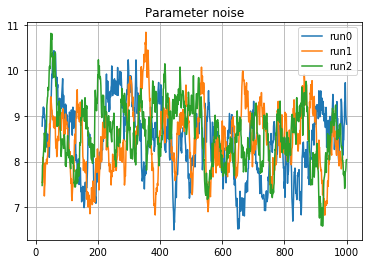

In [81]:
# Plot return
colors = ['r','g','b']
metric = "rollout/return"
me = metric.split('/')[1]
modes = ["SARA","PLA","Random"]
if visitors == "single":
    ylim = [0,27]
else:
    ylim = [0,125]
for mode, c in zip(modes, colors):

    data = all_combined_data[mode]
    length = data.shape[0]
    if length == 0:
        print("No data for {}".format(mode))
        continue
    else:
        plt.figure()
        plt.grid()
        label = "eps="+itv.replace("vpoint","0.").replace("vzero","0")
        plt.fill_between(np.linspace(1,length,length), data[metric+"_avg"] - data[metric+"_std"],
                     data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                     color=c)
        plt.plot(np.linspace(1,length,length), data[metric+'_avg'].rolling(window=10).mean(), '-', color=c,
             label=label)
#         plt.legend(loc="best")
        plt.ylim(ylim)
        plt.title('{} {}'.format(mode,me))
        plt.xlabel("epoch")
        plt.ylabel("reward")
        plt.savefig(plot_save_dir+'{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')


        plt.figure()
        for j in range(len(all_data_files[mode])):
            plt.plot(np.linspace(1,length,length), data[metric+'_run{}'.format(j)].rolling(window=20).mean(), '-', label="run"+str(j))
        plt.title("Parameter noise")
        plt.legend(loc="best")
        plt.grid()
        plt.savefig(plot_save_dir+'{}_{}_{}_allrun.png'.format(itv,mode,me), bbox_inches='tight')

In [34]:
plot_save_dir

'./plots_for_thesis/Tensorboard_to_CSV/single/ddpg/64_64_NN/old/'

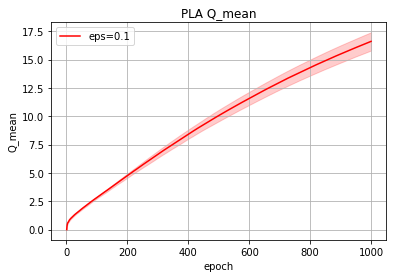

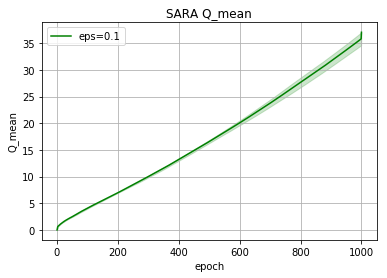

In [11]:
colors = ['r','g','b']
metric = "rollout/Q_mean"
modes = ["PLA","SARA"]
me = metric.split('/')[1]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "eps="+itv.replace("vpoint","0.")
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("Q_mean")
    plt.savefig(plot_save_dir+'{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')
    

# Combine different randomness

In [86]:
import glob
interval = ["vzero","vpoint01","vpoint05","vpoint1","vpoint3"]
# itv = "ddpg"
csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/old/"
plot_save_dir = './plots_for_thesis/multi/lazy_visitor_w_randomess/old_all_eps_combined/'
if not os.path.exists(plot_save_dir):
    os.makedirs(plot_save_dir)
modes = ["PLA","SARA","Random"]
all_data_files = dict()
for itv in interval:
    itv_data_files = dict()
    for mode in modes:
        mode_data_files = glob.glob(csv_dir+itv+"/"+"run_"+ mode +"*.csv")
        mode_data_files.sort()
        print("{} {}: {} files found".format(itv, mode,len(mode_data_files)))
        for f in mode_data_files:
            print(f)
        itv_data_files[mode]=mode_data_files
    all_data_files[itv] = itv_data_files

vzero PLA: 7 files found
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/old/vzero\run_PLA_2019-10-22-104812-0-8_1571755716gra1057_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/old/vzero\run_PLA_2019-10-22-104815-1-8_1571755722gra1063_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/old/vzero\run_PLA_2019-10-23-161114-1-8_1571861498gra701_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/old/vzero\run_PLA_2019-10-23-161120-0-8_1571861505gra641_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/old/vzero\run_PLA_2019-11-16-160331-0-50_1573938236gra105_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/old/vzero\run_PLA_2019-11-16-160331-1-50_1573938235gra125_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/old/vzero\run_PLA_2019-11-16-160333-2-50_1573938237gra1141_file.csv
vzero SARA: 4 fil

In [87]:
all_combined_data = dict()

for itv in interval:
    all_combined_data[itv] = dict()
    for mode in modes:

        mode_data = []
        for file in all_data_files[itv][mode]:
            mode_data.append(pd.read_csv(file))

        # Random has no Q_mean records
        if mode == "Random":
            metrics = ["rollout/return"]
        else:
            metrics = ["rollout/return", "rollout/Q_mean"]

        mode_combined_data = pd.DataFrame()
        for metric in metrics:
            metric_combined_data = pd.DataFrame()
            for i in range(len(all_data_files[itv][mode])):
                metric_combined_data[metric+"_run"+str(i)] = mode_data[i][metric]
            metric_combined_data[metric+"_avg"] = metric_combined_data.mean(axis=1)
            metric_combined_data[metric+'_std'] = metric_combined_data.std(axis=1)

            mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
        all_combined_data[itv][mode] = mode_combined_data

In [88]:
all_combined_data["vzero"]["Random"]

,rollout/return_run0,rollout/return_run1,rollout/return_avg,rollout/return_std
0,33.514599,19.527216,26.520907,6.993691
1,24.623022,23.120049,23.871535,0.751487
2,27.286186,33.732433,30.509310,3.223124
3,32.703793,33.205204,32.954498,0.250706
4,25.381351,30.611202,27.996277,2.614925
5,26.901550,37.125671,32.013611,5.112061
6,26.565067,21.650860,24.107964,2.457104
7,22.525579,28.890282,25.707931,3.182351
8,33.020126,28.388500,30.704313,2.315813
9,31.767763,30.930412,31.349088,0.418675


save to ./plots_for_thesis/multi/lazy_visitor_w_randomess/old_all_eps_combined/
save to ./plots_for_thesis/multi/lazy_visitor_w_randomess/old_all_eps_combined/
save to ./plots_for_thesis/multi/lazy_visitor_w_randomess/old_all_eps_combined/


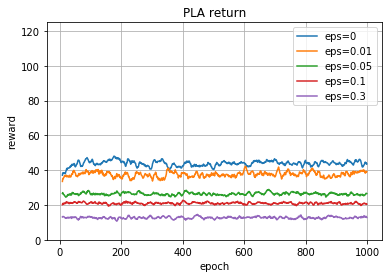

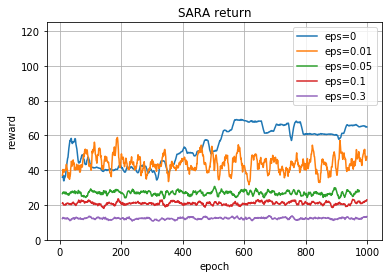

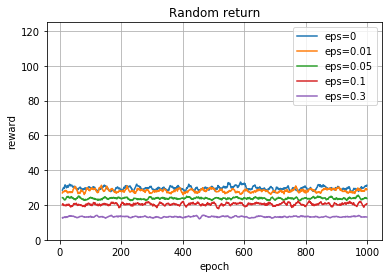

In [89]:
metric = "rollout/return"
me = metric.split('/')[1]
modes = ["PLA","SARA","Random"]
for mode in modes:
    

    plt.figure()
    plt.grid()
    for itv in interval:
        label = "eps="+itv.replace("vpoint","0.").replace("vzero", "0")
        plt.plot(all_combined_data[itv][mode].index, all_combined_data[itv][mode][metric+'_avg'].rolling(window=10).mean(), '-', label=label)
    plt.legend(loc="best")
    plt.ylim([0,125])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(plot_save_dir+"all_eps_combined_{}_{}.png".format(mode,me), bbox_inches='tight')
    print("save to {}".format(plot_save_dir))


# Combine different difficulty

In [71]:
import glob
interval = ["point125","point25","point5","point75","one"]
# itv = "ddpg"
csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/old/"
plot_save_dir = './plots_for_thesis/single/ddpg/64_64_NN/old/old_all_eps_combined/'
if not os.path.exists(plot_save_dir):
    os.makedirs(plot_save_dir)
modes = ["PLA","SARA","Random"]
all_data_files = dict()
for itv in interval:
    itv_data_files = dict()
    for mode in modes:
        mode_data_files = glob.glob(csv_dir+itv+"/"+"run_"+ mode +"*.csv")
        mode_data_files.sort()
        print("{} {}: {} files found".format(itv, mode,len(mode_data_files)))
        for f in mode_data_files:
            print(f)
        itv_data_files[mode]=mode_data_files
    all_data_files[itv] = itv_data_files

point125 PLA: 1 files found
../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/old/point125\run_PLA_2019-11-18-003341-0-81_1574055246gra701_file.csv
point125 SARA: 1 files found
../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/old/point125\run_SARA_2019-11-18-003341-1-80_1574055247gra1101_file.csv
point125 Random: 2 files found
../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/old/point125\run_Random_2019-11-18-003938-0-80_1574055598gra1144_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/old/point125\run_Random_2019-11-18-003940-1-80_1574055600gra47_file.csv
point25 PLA: 1 files found
../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/old/point25\run_PLA_2019-11-18-003341-0-80_1574055249gra1101_file.csv
point25 SARA: 3 files found
../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/old/point25\run_SARA_2019-11-18-003937-0-80_1574055601gra36_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/single/ddpg/64_64_NN/old/point2

In [72]:
all_combined_data = dict()

for itv in interval:
    all_combined_data[itv] = dict()
    for mode in modes:

        mode_data = []
        for file in all_data_files[itv][mode]:
            mode_data.append(pd.read_csv(file))
            print("{} {} {}".format(itv, mode, mode_data[-1].shape[0]))

        # Random has no Q_mean records
        if mode == "Random":
            metrics = ["rollout/return"]
        else:
            metrics = ["rollout/return", "rollout/Q_mean"]

        mode_combined_data = pd.DataFrame()
        for metric in metrics:
            metric_combined_data = pd.DataFrame()
            for i in range(len(all_data_files[itv][mode])):
                metric_combined_data[metric+"_run"+str(i)] = mode_data[i][metric]
            metric_combined_data[metric+"_avg"] = metric_combined_data.mean(axis=1)
            metric_combined_data[metric+'_std'] = metric_combined_data.std(axis=1)

            mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
        all_combined_data[itv][mode] = mode_combined_data

point125 PLA 620
point125 SARA 622
point125 Random 629
point125 Random 618
point25 PLA 581
point25 SARA 623
point25 SARA 629
point25 SARA 616
point25 Random 624
point25 Random 634
point25 Random 614
point5 PLA 620
point5 PLA 625
point5 PLA 573
point5 SARA 618
point5 SARA 590
point5 SARA 599
point5 Random 600
point5 Random 603
point5 Random 604
point75 PLA 562
point75 SARA 592
point75 SARA 591
point75 SARA 584
point75 Random 591
point75 Random 574
point75 Random 572
one PLA 1000
one PLA 1000
one PLA 1000
one PLA 1000
one PLA 1000
one SARA 1000
one SARA 1000
one SARA 1000
one SARA 1000
one Random 996
one Random 1000
one Random 1000
one Random 1000
one Random 1000


In [73]:
all_combined_data["one"]["PLA"]

,rollout/return_run0,rollout/return_run1,rollout/return_run2,rollout/return_run3,rollout/return_run4,rollout/return_avg,rollout/return_std,rollout/Q_mean_run0,rollout/Q_mean_run1,rollout/Q_mean_run2,rollout/Q_mean_run3,rollout/Q_mean_run4,rollout/Q_mean_avg,rollout/Q_mean_std
0,3.398431,3.232099,2.793396,7.720589,2.522172,3.933337,1.918957,-0.002340,-0.001129,0.000662,0.002281,-0.000859,-0.000277,0.001597
1,6.215137,10.800566,5.593658,7.173857,13.438288,8.644301,3.000042,0.063177,0.052178,0.062172,0.075364,0.061004,0.062779,0.007408
2,6.765887,9.349277,5.873875,6.424461,7.808973,7.244495,1.227099,0.118349,0.103399,0.113997,0.134183,0.117324,0.117450,0.009901
3,9.683309,5.393112,6.983391,8.263288,6.387152,7.342050,1.494590,0.161064,0.156792,0.145756,0.179333,0.167830,0.162155,0.011191
4,11.938361,6.761379,5.802249,4.445886,5.225998,6.834775,2.661317,0.184713,0.194878,0.168634,0.205424,0.203844,0.191499,0.013613
5,10.029609,5.445705,9.342165,7.177579,10.519565,8.502924,1.908144,0.206195,0.208450,0.184908,0.217225,0.219709,0.207298,0.012300
6,9.211146,5.636037,7.268823,5.341396,10.062267,7.503934,1.880454,0.230884,0.210765,0.195117,0.232230,0.236137,0.221027,0.015669
7,3.129234,8.133955,8.674002,9.538726,6.449581,7.185100,2.264851,0.239837,0.217916,0.207199,0.253746,0.259491,0.235638,0.020186
8,3.005427,9.128186,5.160749,11.142229,9.771618,7.641642,3.054506,0.245412,0.229638,0.220351,0.269481,0.282248,0.249426,0.023377
9,5.351444,8.881053,10.648005,8.747422,8.178559,8.361297,1.717025,0.252997,0.247064,0.241978,0.284195,0.290903,0.263428,0.020114


save to ./plots_for_thesis/single/ddpg/64_64_NN/old/old_all_eps_combined/
save to ./plots_for_thesis/single/ddpg/64_64_NN/old/old_all_eps_combined/
save to ./plots_for_thesis/single/ddpg/64_64_NN/old/old_all_eps_combined/


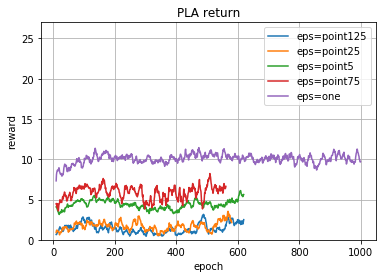

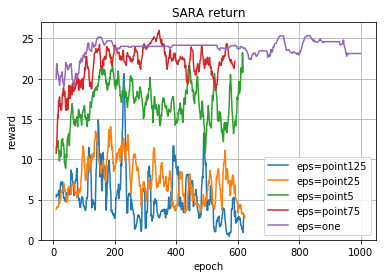

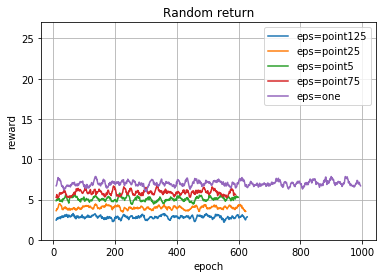

In [74]:
metric = "rollout/return"
me = metric.split('/')[1]
modes = ["PLA","SARA","Random"]
for mode in modes:
    

    plt.figure()
    plt.grid()
    for itv in interval:
        label = "eps="+itv.replace("vpoint","0.").replace("vzero", "0")
        plt.plot(all_combined_data[itv][mode].index, all_combined_data[itv][mode][metric+'_avg'].rolling(window=10).mean(), '-', label=label)
    plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(plot_save_dir+"all_difficulty_combined_{}_{}.png".format(mode,me), bbox_inches='tight')
    print("save to {}".format(plot_save_dir))
